#### This project is created under ITCS 6156 - Machine Learning at UNC Charlotte.  
##### Developer : Monika Bagyal
##### Title : Identifying Suspicious Activities In Financial Data
##### Description : This Jupyter Notebook is used to showcase, how suspicious activities can be caught using a supervised learning algorithm using existing customer data under the compliance department of a bank or financial institution. The results show that False Positives can be reduced using Supervised Machine Learning algorithms because these algorithms have the potential to differentiate between regular and suspicious patterns of customer activity.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### Loading Dataset - Customer Transactions
Note: This is not real world data, this dataset is created by my own work experience to mimic like real data.

In [4]:
df = pd.read_csv('customer_transaction.csv')

In [5]:
df.head()

,is_Alerted,is_Suspicious,Account_number,Transaction_date,transaction_location,transaction_amount,correspondent_bank,party_name,primary_party_account_number,debit_credit,...,identification_number,Score1,Score2,Score3,Score4,Score5,Score6,Score7,Score,is_noncitizen
0,0,0,481071431,11/20/19,94138.0,86810.0,Y,Callie Stephens,373956530,Debit,...,16651008 9730,0,0,0,1,1,0,0,2,0
1,0,0,481071431,11/3/19,13131.0,556.0,Y,Jack Walsh,866665098,Credit,...,16651008 9730,0,0,0,0,0,0,0,0,0
2,0,0,481071431,11/7/19,31014.0,2490.0,N,Marvin Sanders,333833165,Debit,...,16651008 9730,0,0,0,0,0,0,0,0,0
3,0,0,481071431,11/19/19,87141.0,3700.0,Y,Knox Richard,584609046,Debit,...,16651008 9730,0,0,0,0,0,0,0,0,0
4,0,0,481071431,11/1/19,88740.0,11575.0,Y,Glenna Bryant,636260652,Credit,...,16651008 9730,0,0,0,0,1,0,0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424 entries, 0 to 1423
Data columns (total 33 columns):
is_Alerted                      1424 non-null int64
is_Suspicious                   1424 non-null int64
Account_number                  1424 non-null int64
Transaction_date                1424 non-null object
transaction_location            1000 non-null float64
transaction_amount              1424 non-null float64
correspondent_bank              1424 non-null object
party_name                      1000 non-null object
primary_party_account_number    1424 non-null int64
debit_credit                    1424 non-null object
Account_First_name              667 non-null object
Account_Last_Name               667 non-null object
Account_Open_date               1424 non-null object
Account_type                    1424 non-null object
Account_Classification          1424 non-null object
Risk_level                      1424 non-null object
Zipcode                         1424 non-null obj

#### Score column is calculated based on various rules if transaction_amount > 10k or more than that. Risk_level also contributes to score calculation and other rule based scenarios which generally are part of ETL logic.


#### is_Alerted column represent an alert generated transaction by ETL system.
#### is_Suspicious column represent a Real Suspicious transaction reported by Compliance Person.



In [7]:
df.describe()

,is_Alerted,is_Suspicious,Account_number,transaction_location,transaction_amount,primary_party_account_number,Annual_income,Score1,Score2,Score3,Score4,Score5,Score6,Score7,Score,is_noncitizen
count,1424.000000,1424.000000,1.424000e+03,1000.000000,1424.000000,1.424000e+03,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000
mean,0.136938,0.116573,5.440362e+08,54366.597000,8491.331170,5.501509e+08,47878.659059,0.050562,0.167135,0.008427,0.009831,0.217697,0.247191,0.247191,0.948034,0.247191
std,0.343903,0.321024,2.555217e+08,26062.883698,35879.609748,2.562983e+08,35122.208412,0.219178,0.373227,0.091443,0.098700,0.412825,0.431530,0.431530,1.142101,0.431530
min,0.000000,0.000000,1.005775e+08,10013.000000,100.000000,1.001543e+08,12000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.259848e+08,32411.750000,500.000000,3.352303e+08,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,5.401266e+08,53346.500000,3862.500000,5.600725e+08,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,7.614837e+08,76249.500000,9256.250000,7.641838e+08,57084.958330,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
max,1.000000,1.000000,9.996656e+08,99992.000000,978455.000000,9.996656e+08,279125.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [8]:
df.corr().head(2).transpose()

,is_Alerted,is_Suspicious
is_Alerted,1.000000,0.911953
is_Suspicious,0.911953,1.000000
Account_number,-0.013886,-0.041613
transaction_location,-0.039017,-0.045316
transaction_amount,0.168473,0.193095
primary_party_account_number,-0.038247,-0.017090
Annual_income,0.067657,0.111626
Score1,0.327619,0.075973
Score2,0.560690,0.558696
Score3,0.231437,0.253781


## is_Suspicious column will be our target variable 
is_Alerted column will not be used to train, as this column represents traditional method to generate alert.

In [9]:
df.columns

Index(['is_Alerted', 'is_Suspicious', 'Account_number', 'Transaction_date',
       'transaction_location', 'transaction_amount', 'correspondent_bank',
       'party_name', 'primary_party_account_number', 'debit_credit',
       'Account_First_name', 'Account_Last_Name', 'Account_Open_date',
       'Account_type', 'Account_Classification', 'Risk_level', 'Zipcode',
       'Annual_income', 'citizenship_country', 'email', 'address', 'branch',
       'Business_Sector', 'identification_number', 'Score1', 'Score2',
       'Score3', 'Score4', 'Score5', 'Score6', 'Score7', 'Score',
       'is_noncitizen'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424 entries, 0 to 1423
Data columns (total 33 columns):
is_Alerted                      1424 non-null int64
is_Suspicious                   1424 non-null int64
Account_number                  1424 non-null int64
Transaction_date                1424 non-null object
transaction_location            1000 non-null float64
transaction_amount              1424 non-null float64
correspondent_bank              1424 non-null object
party_name                      1000 non-null object
primary_party_account_number    1424 non-null int64
debit_credit                    1424 non-null object
Account_First_name              667 non-null object
Account_Last_Name               667 non-null object
Account_Open_date               1424 non-null object
Account_type                    1424 non-null object
Account_Classification          1424 non-null object
Risk_level                      1424 non-null object
Zipcode                         1424 non-null obj

### Feature Selection

In [11]:
df_features = df[['is_Alerted', 'is_Suspicious', 'transaction_amount', 'correspondent_bank',
                  'debit_credit', 'Account_type', 'Account_Classification', 'Risk_level', 
                  'Annual_income', 'is_noncitizen']]

In [12]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424 entries, 0 to 1423
Data columns (total 10 columns):
is_Alerted                1424 non-null int64
is_Suspicious             1424 non-null int64
transaction_amount        1424 non-null float64
correspondent_bank        1424 non-null object
debit_credit              1424 non-null object
Account_type              1424 non-null object
Account_Classification    1424 non-null object
Risk_level                1424 non-null object
Annual_income             1424 non-null float64
is_noncitizen             1424 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 111.3+ KB


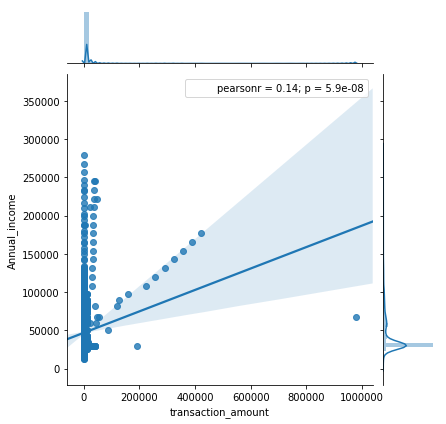

In [13]:
sns.jointplot(x='transaction_amount',y='Annual_income',data=df_features,kind='reg')

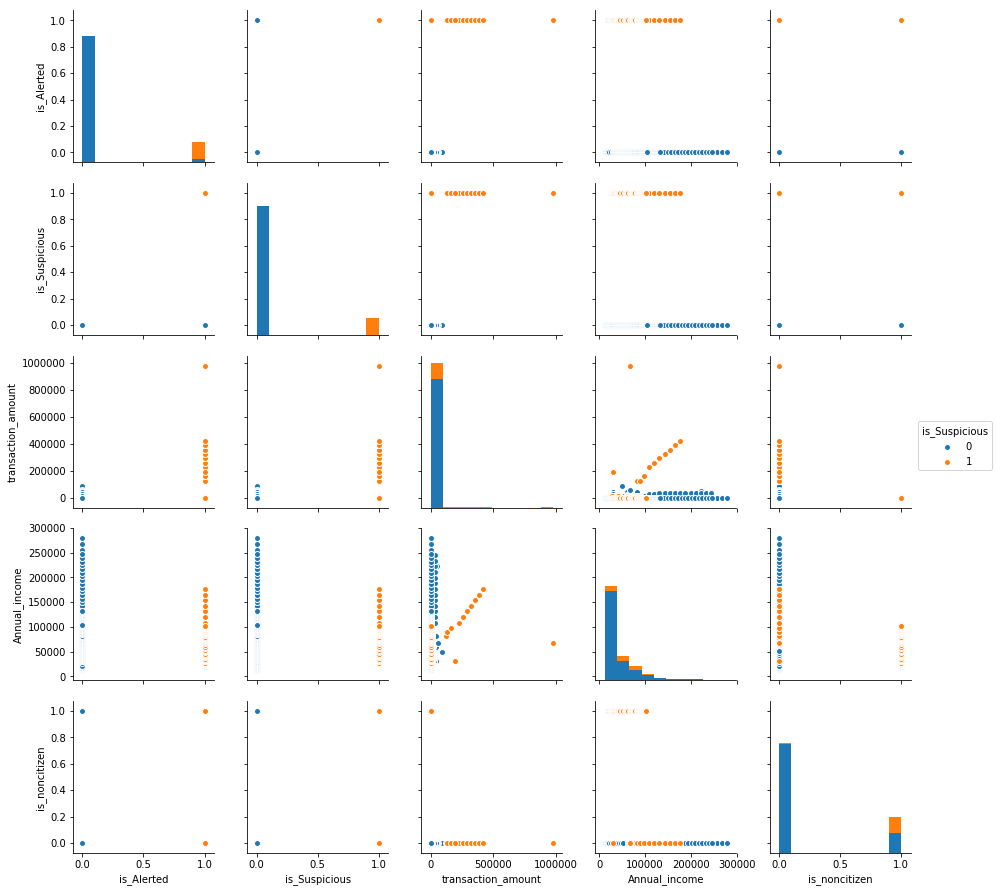

In [14]:
sns.pairplot(df_features,hue='is_Suspicious')

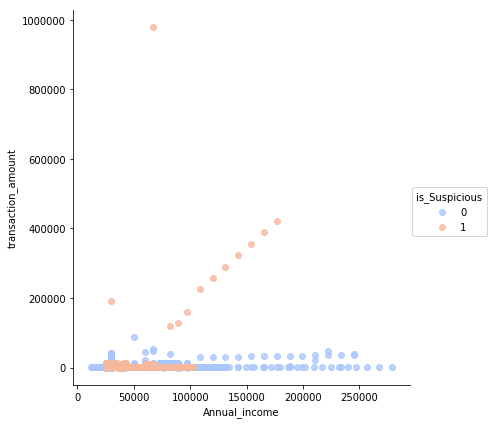

In [15]:
sns.lmplot('Annual_income','transaction_amount',data=df, hue='is_Suspicious',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

#### One-Hot-Encoding

In [16]:
df_transformed = pd.get_dummies(df_features)

In [17]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424 entries, 0 to 1423
Data columns (total 16 columns):
is_Alerted                           1424 non-null int64
is_Suspicious                        1424 non-null int64
transaction_amount                   1424 non-null float64
Annual_income                        1424 non-null float64
is_noncitizen                        1424 non-null int64
correspondent_bank_N                 1424 non-null uint8
correspondent_bank_Y                 1424 non-null uint8
debit_credit_Credit                  1424 non-null uint8
debit_credit_Debit                   1424 non-null uint8
Account_type_B-Business              1424 non-null uint8
Account_type_P-Private               1424 non-null uint8
Account_Classification_C-Checking    1424 non-null uint8
Account_Classification_S-Savings     1424 non-null uint8
Risk_level_High                      1424 non-null uint8
Risk_level_Low                       1424 non-null uint8
Risk_level_Medium                 

In [18]:
df_transformed.corr().head(2).transpose()

,is_Alerted,is_Suspicious
is_Alerted,1.000000,0.911953
is_Suspicious,0.911953,1.000000
transaction_amount,0.168473,0.193095
Annual_income,0.067657,0.111626
is_noncitizen,0.638309,0.573054
correspondent_bank_N,-0.107488,-0.084958
correspondent_bank_Y,0.107488,0.084958
debit_credit_Credit,-0.026222,-0.055296
debit_credit_Debit,0.026222,0.055296
Account_type_B-Business,-0.198228,-0.181978


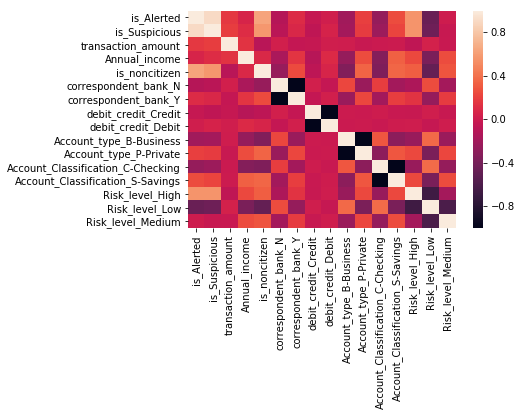

In [19]:
sns.heatmap(df_transformed.corr())

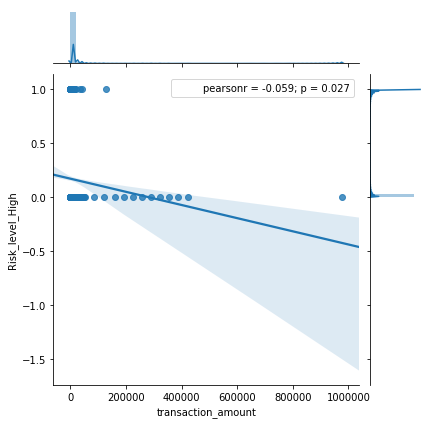

In [20]:
sns.jointplot(x='transaction_amount',y='Risk_level_High',data=df_transformed,kind='reg')

### Machine Learning Algorithms

In [21]:
X = df_transformed.drop(['is_Alerted', 'is_Suspicious'], axis=1)
y = df_transformed['is_Suspicious']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


#### Logistic Regression Model

In [22]:

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95       305
           1       1.00      0.39      0.56        51

   micro avg       0.91      0.91      0.91       356
   macro avg       0.95      0.70      0.76       356
weighted avg       0.92      0.91      0.90       356

[[305   0]
 [ 31  20]]


In [23]:
cf = confusion_matrix(y_test,predictions)

In [24]:
TP = cf[0][0]
FP = cf[0][1]
FN = cf[1][0]
TN = cf[1][1]
recall = TP/(TP+FN)
accuracy = TP/(TP+FP)
print("Accuracy on testing data: {:.4f} \n\nRecall on testing data: {:.4f}".format(accuracy,recall))

Accuracy on testing data: 1.0000 

Recall on testing data: 0.9077


#### Random Forest Classifier

In [25]:

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       305
           1       0.98      0.84      0.91        51

   micro avg       0.97      0.97      0.97       356
   macro avg       0.98      0.92      0.95       356
weighted avg       0.97      0.97      0.97       356

[[304   1]
 [  8  43]]


In [26]:
cf = confusion_matrix(y_test,predictions)
cf

array([[304,   1],
       [  8,  43]])

In [27]:
TP = cf[0][0]
FP = cf[0][1]
FN = cf[1][0]
TN = cf[1][1]

In [28]:
recall = TP/(TP+FN)
accuracy = TP/(TP+FP)

In [29]:
print("Accuracy on testing data: {:.4f} \n\nRecall on testing data: {:.4f}".format(accuracy,recall))

Accuracy on testing data: 0.9967 

Recall on testing data: 0.9744


## Analysis on Naive vs Machine Learning approach

In [30]:
# Number of transaction to be raised as suspicious by Naive approach or plain ETL logic
print("Alerted transactions:",len(df_transformed[df_transformed['is_Alerted'] == 1]))

# Number of transaction marked as real suspicious and goes for final reporting
print("Real Suspicious Transactions:",len(df_transformed[df_transformed['is_Suspicious']==1]))


# Number of False Positive generated by ETL/Naive logic
print("False Positive generated by Naive logic: {}%".format(round(100*(len(df_transformed[df_transformed['is_Alerted'] == 1]) - 
      len(df_transformed[df_transformed['is_Suspicious']==1]))/len(df_transformed[df_transformed['is_Suspicious']==1]),2)))


Alerted transactions: 195
Real Suspicious Transactions: 166
False Positive generated by Naive logic: 17.47%


### Comparing

In [31]:
print("False Positive generated by Machine Learning : {:.4f}%".format(100*FP/(TP+TN+FN)))


False Positive generated by Machine Learning : 0.2817%


# In Progress